# Project: Classifiyng Tickets in Customer Support

In [1]:
import pandas as pd
import numpy as np
import random
from scipy import stats
import statistics as stat
import string
import re
import seaborn as sns
import matplotlib as plt

In [2]:
import nltk

In [3]:
df = pd.read_csv('C:\\Users\\mirab\\Desktop\\Bivariat\\Casos_de_Estudio\\Tickets\\tickets.csv', encoding='iso-8859-1')

In [4]:
df

,Fuente,Descripción,Quién Llamó,Agente,Prioridad p/él,Pendiente Respuesta,Nº FAQ,Estado,Tipo Ticket,Coment.Interno,Coment.Final,Cantidad de Llamados,Usuario Creador,Modificado
0,"Albarenga Bordad, Carla Micaela",pepe,mica,Micaela,1. Máxima,16/05/2018 00:00,NaN,Esperando por cliente,Implementación,NaN,prueba prueba finalizado,2.0,Carolina,08/02/2021 12:43:07
1,"Albarenga Bordad, Carla Micaela",qdfk{dfasdfasd,Mica,Micaela,1. Máxima,17/05/2018 00:00,NaN,Finalizado,Implementación,NaN,NaN,1.0,Carolina,08/02/2021 12:41:34
2,Silvialy S.R.l,Se realiza micro reunion lite,NaN,Majo,3. Media,21/10/2019 00:00,NaN,Finalizado,Implementación,NaN,NaN,NaN,Majo,21/10/2019 11:45:48
3,Cema Sa,Se realiza micro reunion lite,NaN,Majo,3. Media,21/10/2019 00:00,NaN,Pendiente,Dudas de funcionamiento,NaN,NaN,NaN,Majo,21/10/2019 11:44:51
4,La Papelera,Configurar reportes de e factura,NaN,CamilaR,2. Alta,09/04/2019 00:00,NaN,Finalizado y Enviado,e-Factura,#1038881,NaN,NaN,Majo,30/05/2019 10:26:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44086,Rontil S.A.,Tiene una consulta sobre como realizar el cost...,Mónica,Micaela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Majo,20/06/2016 10:52:19
44087,Emec Ltda (Emec),Puesto de trabajo,Gabriel,exCecilia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,exCecilia,20/06/2016 10:37:03
44088,Superfiestas Cotillon (Inbrel S.A.),correcciones E-factura,Carlos,Micaela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,exCecilia,20/06/2016 10:29:17
44089,Emec Ltda (Emec),Quiere hacer un recibo de cobro en una sucursa...,Gabriel,Micaela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,exCecilia,20/06/2016 10:29:06


In [5]:
df = df.drop(['Fuente', 'Quién Llamó', 'Nº FAQ', 'Coment.Interno', 'Coment.Final', 'Usuario Creador'], axis=1)

In [6]:
df

,Descripción,Agente,Prioridad p/él,Pendiente Respuesta,Estado,Tipo Ticket,Cantidad de Llamados,Modificado
0,pepe,Micaela,1. Máxima,16/05/2018 00:00,Esperando por cliente,Implementación,2.0,08/02/2021 12:43:07
1,qdfk{dfasdfasd,Micaela,1. Máxima,17/05/2018 00:00,Finalizado,Implementación,1.0,08/02/2021 12:41:34
2,Se realiza micro reunion lite,Majo,3. Media,21/10/2019 00:00,Finalizado,Implementación,NaN,21/10/2019 11:45:48
3,Se realiza micro reunion lite,Majo,3. Media,21/10/2019 00:00,Pendiente,Dudas de funcionamiento,NaN,21/10/2019 11:44:51
4,Configurar reportes de e factura,CamilaR,2. Alta,09/04/2019 00:00,Finalizado y Enviado,e-Factura,NaN,30/05/2019 10:26:30
...,...,...,...,...,...,...,...,...
44086,Tiene una consulta sobre como realizar el cost...,Micaela,NaN,NaN,NaN,NaN,NaN,20/06/2016 10:52:19
44087,Puesto de trabajo,exCecilia,NaN,NaN,NaN,NaN,NaN,20/06/2016 10:37:03
44088,correcciones E-factura,Micaela,NaN,NaN,NaN,NaN,NaN,20/06/2016 10:29:17
44089,Quiere hacer un recibo de cobro en una sucursa...,Micaela,NaN,NaN,NaN,NaN,NaN,20/06/2016 10:29:06


In [7]:
df = df.rename(columns=({'Descripción':'Texto', 'Prioridad p/él':'Prioridad', 'Pendiente Respuesta':'Fecha Ingreso', 'Modificado':'Cierre'}))

In [8]:
df

,Texto,Agente,Prioridad,Fecha Ingreso,Estado,Tipo Ticket,Cantidad de Llamados,Cierre
0,pepe,Micaela,1. Máxima,16/05/2018 00:00,Esperando por cliente,Implementación,2.0,08/02/2021 12:43:07
1,qdfk{dfasdfasd,Micaela,1. Máxima,17/05/2018 00:00,Finalizado,Implementación,1.0,08/02/2021 12:41:34
2,Se realiza micro reunion lite,Majo,3. Media,21/10/2019 00:00,Finalizado,Implementación,NaN,21/10/2019 11:45:48
3,Se realiza micro reunion lite,Majo,3. Media,21/10/2019 00:00,Pendiente,Dudas de funcionamiento,NaN,21/10/2019 11:44:51
4,Configurar reportes de e factura,CamilaR,2. Alta,09/04/2019 00:00,Finalizado y Enviado,e-Factura,NaN,30/05/2019 10:26:30
...,...,...,...,...,...,...,...,...
44086,Tiene una consulta sobre como realizar el cost...,Micaela,NaN,NaN,NaN,NaN,NaN,20/06/2016 10:52:19
44087,Puesto de trabajo,exCecilia,NaN,NaN,NaN,NaN,NaN,20/06/2016 10:37:03
44088,correcciones E-factura,Micaela,NaN,NaN,NaN,NaN,NaN,20/06/2016 10:29:17
44089,Quiere hacer un recibo de cobro en una sucursa...,Micaela,NaN,NaN,NaN,NaN,NaN,20/06/2016 10:29:06


In [9]:
df['Especialidad'] = 'NaN'
df['Tipo de Producto'] = 'NaN'
df['Rating'] = 'NaN'

In [10]:
df

,Texto,Agente,Prioridad,Fecha Ingreso,Estado,Tipo Ticket,Cantidad de Llamados,Cierre,Especialidad,Tipo de Producto,Rating
0,pepe,Micaela,1. Máxima,16/05/2018 00:00,Esperando por cliente,Implementación,2.0,08/02/2021 12:43:07,NaN,NaN,NaN
1,qdfk{dfasdfasd,Micaela,1. Máxima,17/05/2018 00:00,Finalizado,Implementación,1.0,08/02/2021 12:41:34,NaN,NaN,NaN
2,Se realiza micro reunion lite,Majo,3. Media,21/10/2019 00:00,Finalizado,Implementación,NaN,21/10/2019 11:45:48,NaN,NaN,NaN
3,Se realiza micro reunion lite,Majo,3. Media,21/10/2019 00:00,Pendiente,Dudas de funcionamiento,NaN,21/10/2019 11:44:51,NaN,NaN,NaN
4,Configurar reportes de e factura,CamilaR,2. Alta,09/04/2019 00:00,Finalizado y Enviado,e-Factura,NaN,30/05/2019 10:26:30,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
44086,Tiene una consulta sobre como realizar el cost...,Micaela,NaN,NaN,NaN,NaN,NaN,20/06/2016 10:52:19,NaN,NaN,NaN
44087,Puesto de trabajo,exCecilia,NaN,NaN,NaN,NaN,NaN,20/06/2016 10:37:03,NaN,NaN,NaN
44088,correcciones E-factura,Micaela,NaN,NaN,NaN,NaN,NaN,20/06/2016 10:29:17,NaN,NaN,NaN
44089,Quiere hacer un recibo de cobro en una sucursa...,Micaela,NaN,NaN,NaN,NaN,NaN,20/06/2016 10:29:06,NaN,NaN,NaN


In [11]:
df[df['Prioridad'].isnull()]

,Texto,Agente,Prioridad,Fecha Ingreso,Estado,Tipo Ticket,Cantidad de Llamados,Cierre,Especialidad,Tipo de Producto,Rating
10588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/06/2018 14:37:26,NaN,NaN,NaN
10598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/06/2018 14:32:49,NaN,NaN,NaN
10611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/06/2018 14:28:10,NaN,NaN,NaN
32128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26/05/2017 11:17:37,NaN,NaN,NaN
43772,Esta ingresando un pago y no le deja cargar el...,Micaela,NaN,27/06/2016 16:00,Finalizado,NaN,NaN,28/06/2016 9:28:04,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
44086,Tiene una consulta sobre como realizar el cost...,Micaela,NaN,NaN,NaN,NaN,NaN,20/06/2016 10:52:19,NaN,NaN,NaN
44087,Puesto de trabajo,exCecilia,NaN,NaN,NaN,NaN,NaN,20/06/2016 10:37:03,NaN,NaN,NaN
44088,correcciones E-factura,Micaela,NaN,NaN,NaN,NaN,NaN,20/06/2016 10:29:17,NaN,NaN,NaN
44089,Quiere hacer un recibo de cobro en una sucursa...,Micaela,NaN,NaN,NaN,NaN,NaN,20/06/2016 10:29:06,NaN,NaN,NaN


In [12]:
rating = [random.randint(1,6) for i in range(len(df))]

In [13]:
df['Rating'] = rating

In [14]:
df['Prioridad'] = df['Prioridad'].fillna(stat.mode(df['Prioridad']))

In [15]:
df

,Texto,Agente,Prioridad,Fecha Ingreso,Estado,Tipo Ticket,Cantidad de Llamados,Cierre,Especialidad,Tipo de Producto,Rating
0,pepe,Micaela,1. Máxima,16/05/2018 00:00,Esperando por cliente,Implementación,2.0,08/02/2021 12:43:07,NaN,NaN,2
1,qdfk{dfasdfasd,Micaela,1. Máxima,17/05/2018 00:00,Finalizado,Implementación,1.0,08/02/2021 12:41:34,NaN,NaN,2
2,Se realiza micro reunion lite,Majo,3. Media,21/10/2019 00:00,Finalizado,Implementación,NaN,21/10/2019 11:45:48,NaN,NaN,5
3,Se realiza micro reunion lite,Majo,3. Media,21/10/2019 00:00,Pendiente,Dudas de funcionamiento,NaN,21/10/2019 11:44:51,NaN,NaN,4
4,Configurar reportes de e factura,CamilaR,2. Alta,09/04/2019 00:00,Finalizado y Enviado,e-Factura,NaN,30/05/2019 10:26:30,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
44086,Tiene una consulta sobre como realizar el cost...,Micaela,3. Media,NaN,NaN,NaN,NaN,20/06/2016 10:52:19,NaN,NaN,4
44087,Puesto de trabajo,exCecilia,3. Media,NaN,NaN,NaN,NaN,20/06/2016 10:37:03,NaN,NaN,3
44088,correcciones E-factura,Micaela,3. Media,NaN,NaN,NaN,NaN,20/06/2016 10:29:17,NaN,NaN,4
44089,Quiere hacer un recibo de cobro en una sucursa...,Micaela,3. Media,NaN,NaN,NaN,NaN,20/06/2016 10:29:06,NaN,NaN,4


In [16]:
df['Estado'].unique()

array(['Esperando por cliente', 'Finalizado', 'Pendiente',
       'Finalizado y Enviado', 'Finalizado y Seguimento Ok',
       'Pre-pendiente', 'Global', 'Pasado a Tarea de Desarrollo',
       'Finalizado y Seguimento Medio', 'Testeando', 'Esperando Pago',
       'Trabajando', 'Visto', 'Finalizado y Seguimento Malo', nan],
      dtype=object)

In [17]:
llamados = [random.randint(1,20) for i in range(len(df))]

In [18]:
df['Cantidad de Llamados'] = llamados

In [19]:
df['Agente'].unique()

array(['Micaela', 'Majo', 'CamilaR', 'Patricia', 'Camila', 'Fiza',
       'CBarreto', 'Antonella', 'Carolina', 'exMLorenzo', 'Marianna',
       'Johanna', 'Victoria', 'Natalia', 'Vanessa', 'Z exDario',
       'Richard', 'Carlos', 'Luis', 'Zex SantiagoG', 'Marianella',
       'exPablo', 'Alejandra', 'Gonzalo', 'Benito', 'exMaximiliano',
       'Fabrizio', 'Erik', 'Z exIgnacio', 'exFederico', 'Verónica',
       'exAgustin', 'Jennifer', nan, 'exJuanI', 'exEmmanuel',
       'Z exSoledad', 'Andres', 'Ilana', 'Admin', 'exAlexis', 'exLucas',
       'exCecilia', 'Z exGraciela', 'exJohanna', 'Z exMariana',
       'Z exSofia', 'Z exPatricia', 'exGuillermo', 'exGimena',
       'exNataliaB', 'exMaite', 'exRomina', 'exMartin'], dtype=object)

In [20]:
departamento = []

for i in range(len(df)):
    if (df['Agente'][i] == 'Z exGraciela') | (df['Agente'][i] == 'Verónica') | (df['Agente'][i] == 'Marianella') | (df['Agente'][i] == 'Carlos') | (df['Agente'][i] == 'Admin'):
        departamento.append('Administración')
    elif (df['Agente'][i] == 'exMLorenzo') | (df['Agente'][i] == 'Richard') | (df['Agente'][i] == 'exPablo') | (df['Agente'][i] == 'Alejandra') | (df['Agente'][i] == 'exMaximiliano') | (df['Agente'][i] == 'Fabrizio') | (df['Agente'][i] == 'Erik') | (df['Agente'][i] == 'exFederico') | (df['Agente'][i] == 'exAgustin') | (df['Agente'][i] == 'Andres') | (df['Agente'][i] == 'exAlexis') | (df['Agente'][i] == 'exMaite') | (df['Agente'][i] == 'exLucas'):
        departamento.append('Programación')
    elif (df['Agente'][i] == 'Z exIgnacio') | (df['Agente'][i] == 'Benito') | (df['Agente'][i] == 'Z exSoledad') | (df['Agente'][i] == 'Z exDario') | (df['Agente'][i] == 'Luis'):
        departamento.append('Comercial')
    else:
        departamento.append('Soporte e Implementación')

In [21]:
df['Departamento'] = departamento

In [22]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_sp = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mirab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
type(stop_words_sp)

set

In [24]:
stop_words_sp.update(['quiere', 'puede', 'tiene', 'cuando', 'te paso', 'sacar', 'salen', 'se', 'configurar', 'consulta', 'hacer', 'realiza'])

In [25]:
df['Texto'] = df['Texto'].astype(str)

In [26]:
df['Texto'] = df['Texto'].str.lower()

In [27]:
palabras = []
texto_reformado = []
texto = []

for i in range(len(df)):
    palabras.append(df['Texto'][i].split())
    texto_reformado.append(['' if palabra in stop_words_sp else palabra for palabra in palabras[i]])
    #texto = "".join(texto_reformado[i])
    texto.append(" ".join(str(m) for m in texto_reformado[i]))
    

In [28]:
df['Texto'] = texto

In [31]:
tipo_producto = np.random.choice(['Go', 'Lite', 'Desktop', 'Contable'], size = len(df), p = [.4, .3, .2, .1])

In [32]:
df['Tipo de Producto'] = tipo_producto

In [33]:
df['Tipo Ticket'].unique()

array(['Implementación', 'Dudas de funcionamiento', 'e-Factura',
       'Soporte de Gentileza', 'Lite', 'Instalación', 'Error de Programa',
       'Problemas de conexión', 'Reportes', 'Re-Instalación',
       'Ajuste de Reporte', 'ADM-VENTAS', 'web', 'Desarrollo',
       'Presupuesto', nan], dtype=object)

In [34]:
df['Tipo Ticket'] = df['Tipo Ticket'].fillna('Dudas de funcionamiento')

In [39]:
df['Texto'] = df['Texto'].str.lower()

## Predecir temática través del texto de la consulta

In [41]:
tematica = pd.DataFrame(df, columns = ['Texto', 'Especialidad'])

In [42]:
contabilidad = ['balancete', 'asientos', 'asiento', 'cierre', 'diferencia cambio', 'informe', 'informes', 'conciliacion', 'cuenta']
facturacion = ['recibo cobro', 'nota credito', 'pedido', 'sucursal', 'factura', 'facturar', 'precios', 'cobranza']
stock = ['inventario', 'stock', 'almacen', 'deposito', 'unidades', 'materia prima', 'costeo', 'modulo procesos', 'valorado', 'asistente procesos']
efactura = ['certificar', 'e-factura', 'efactura', 'postular', 'checklist', 'reportes gestion', 'check list', 'resguardo', 'resguardos', 'sobres', 'rechazados', 'e-ticket', 'eticket', 'certificado']
instalacion = ['configurar', 'instalar', 'licencia', 'reinstalar', 'conectar', 'logo', 'conexión', 'impresion', 'respaldar']
implementacion = ['micro reunion', 'imple', 'implementacion']

In [43]:
tipos_consultas = contabilidad + facturacion + stock + efactura + instalacion + implementacion

In [44]:
esp = [0] * len(tematica)

In [45]:
for clave in tipos_consultas:
    for i in range(len(tematica)):
        if (tematica['Texto'][i].find(clave)==-1) & (esp[i] == 0):
            esp[i] = 'Otra'
        elif (tematica['Texto'][i].find(clave)==-1) & (esp[i] != 'Otra'):
            esp[i] = esp[i]
        elif (tematica['Texto'][i].find(clave)==-1) & (esp[i] == 'Otra'):
            esp[i] = 'Otra'
        elif (tematica['Texto'][i].find(clave) > 0) & (esp[i] == 'Otra'):
            esp[i] = clave
        elif (tematica['Texto'][i].find(clave) > 0) & (esp[i] != 'Otra'):
            esp[i] = clave
        elif (tematica['Texto'][i].find(clave) > 0) & (esp[i] == 0):
            esp[i] = clave

In [46]:
tematica['Especialidad'] = esp

In [47]:
len(esp)

44091

In [48]:
tematica['Especialidad'].unique()

array(['Otra', 'micro reunion', 'factura', 'valorado', 'stock', 'imple',
       'pedido', 'e-factura', 'certificar', 'facturar', 'licencia',
       'resguardos', 'informe', 'rechazados', 'conexión', 'informes',
       'logo', 'conectar', 'cuenta', 'resguardo', 'implementacion',
       'cierre', 'efactura', 'certificado', 'instalar', 'precios',
       'impresion', 'cobranza', 'sobres', 'check list', 'sucursal',
       'configurar', 'unidades', 'eticket', 'asiento', 'balancete',
       'inventario', 'deposito', 'e-ticket', 'almacen', 'costeo',
       'reinstalar', 'postular', 'checklist', 'reportes gestion',
       'nota credito', 'conciliacion', 'materia prima',
       'asistente procesos', 'diferencia cambio'], dtype=object)

In [50]:
tema_llamado = []

for i in range(len(tematica)):
    if tematica['Especialidad'][i] in contabilidad:
        tema_llamado.append('Contabilidad')
    elif tematica['Especialidad'][i] in facturacion:
        tema_llamado.append('Facturación')
    elif tematica['Especialidad'][i] in stock:
        tema_llamado.append('Stock')
    elif tematica['Especialidad'][i] in efactura:
        tema_llamado.append('Facturación Electrónica')
    elif tematica['Especialidad'][i] in instalacion:
        tema_llamado.append('Instalación y Reportes')
    elif tematica['Especialidad'][i] in implementacion:
        tema_llamado.append('Implementación')
    elif tematica['Especialidad'][i] not in tipos_consultas:
        tema_llamado.append('Otra')

In [51]:
len(tema_llamado)

44091

In [53]:
tematica['Especialidad'] = tema_llamado
df['Especialidad'] = tema_llamado

In [54]:
tematica['Especialidad'].groupby(tematica['Especialidad']).count().reset_index(name='count').sort_values(['count'], ascending=False)

,Especialidad,count
5,Otra,26508
1,Facturación,6352
4,Instalación y Reportes,4110
2,Facturación Electrónica,2686
0,Contabilidad,2009
6,Stock,1372
3,Implementación,1054


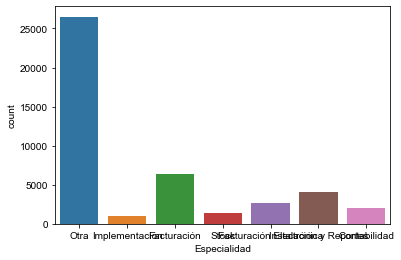

In [55]:
#Desbalanceamiento. Si usaramos éstos datos para modelo de machine learning el modelo aprenderia mucho mas de "Otras" que de las demás categorías. Por lo que hay que corregirlo.
sns.countplot(tematica['Especialidad'])
sns.set(rc={'figure.figsize':(16,9)})

In [56]:
#Clases minoritarias:
otras_mayor = tematica[tematica['Especialidad']=='Otra']
conta_minor = tematica[tematica['Especialidad']=='Contabilidad']
imple_minor = tematica[tematica['Especialidad']=='Implementación']
factu_minor = tematica[tematica['Especialidad']=='Facturación']
stock_minor = tematica[tematica['Especialidad']=='Stock']
insta_minor = tematica[tematica['Especialidad']=='Instalación y Reportes']
efact_minor = tematica[tematica['Especialidad']=='Facturación Electrónica']

In [57]:
from sklearn.utils import resample

efact_minor_upsampled = resample(efact_minor, replace = True, n_samples = len(tematica[tematica['Especialidad']=='Otra']), random_state = 1)
insta_minor_upsampled = resample(insta_minor, replace = True, n_samples = len(tematica[tematica['Especialidad']=='Otra']), random_state = 1)
stock_minor_upsampled = resample(stock_minor, replace = True, n_samples = len(tematica[tematica['Especialidad']=='Otra']), random_state = 1)
factu_minor_upsampled = resample(factu_minor, replace = True, n_samples = len(tematica[tematica['Especialidad']=='Otra']), random_state = 1)
imple_minor_upsampled = resample(imple_minor, replace = True, n_samples = len(tematica[tematica['Especialidad']=='Otra']), random_state = 1)
conta_minor_upsampled = resample(conta_minor, replace = True, n_samples = len(tematica[tematica['Especialidad']=='Otra']), random_state = 1)


In [58]:
tematica_balanceada = pd.concat([otras_mayor, efact_minor_upsampled, insta_minor_upsampled, stock_minor_upsampled, factu_minor_upsampled, imple_minor_upsampled, conta_minor_upsampled])

In [59]:
len(tematica_balanceada)

185556

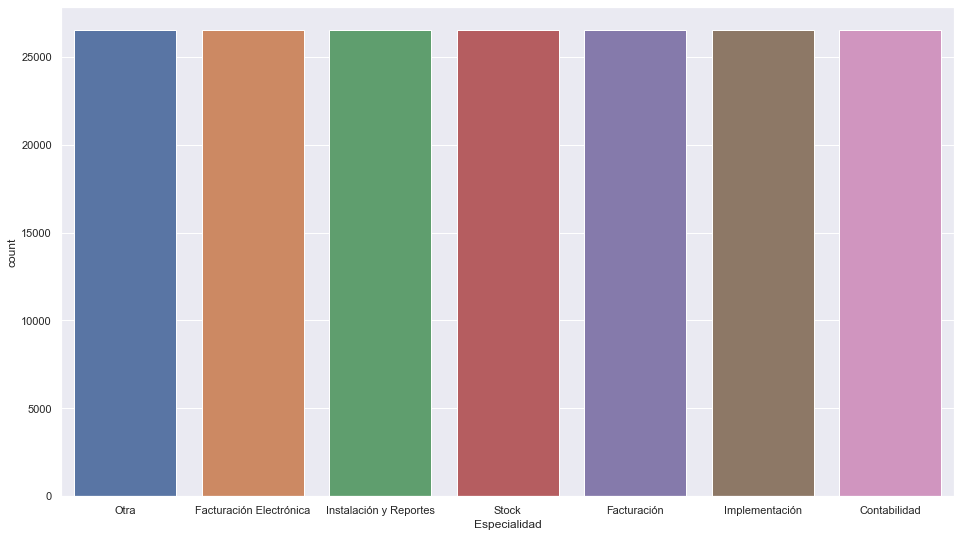

In [60]:
sns.countplot(tematica_balanceada['Especialidad'])
sns.set(rc={'figure.figsize':(16,9)})

In [61]:
todas_consultas = tematica_balanceada['Texto'].tolist()

In [62]:
etiquetas = tematica_balanceada['Especialidad'].tolist()

## Crear datos de entrenamiento y test

In [63]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(todas_consultas, etiquetas, test_size = 0.2, random_state = 1)

In [64]:
print(len(train_data))
print(len(test_data))

148444
37112


## Hacer Count Vector 

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

counter = CountVectorizer()
counter.fit(train_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

In [66]:
print(train_data[5])
print(train_counts[5])

reinstalar zfc   pidió crédito, id  cliente 6171
  (0, 7261)	1
  (0, 13936)	1
  (0, 15276)	1
  (0, 19072)	1
  (0, 22668)	1
  (0, 24047)	1
  (0, 27229)	1


## Entrenar y testear Naive Bayes Classifier

In [67]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(train_counts, train_labels)
predictions = classifier.predict(test_counts)

## Evaluar modelo

In [68]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_labels, predictions))

0.8737066178055616


In [69]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_labels, predictions))

[[5234    9    8   23   12    9   42]
 [  35 4320  379   44  243    3  182]
 [  21  140 5032   30   28   13    5]
 [   0    3    7 5261   11    9    5]
 [  24   22   74   21 5087   35    7]
 [ 532  595  656  346  678 2257  357]
 [   7   11    0   55    5    1 5234]]


## Testear nuevas consultas 

In [70]:
consulta = "sacar balancete de saldos actualizado"
consulta_count = counter.transform([consulta])
print(classifier.predict(consulta_count))

['Contabilidad']


In [71]:
consulta2 = "Desde el estudio contable de esta empresa nos están solicitando crear un artículo exento, que tenga indicador de facturación 12 (que viaje a DGI como IVA en suspenso). ¿Cómo podemos hacer eso en el sistema?"
consulta2_count = counter.transform([consulta2])
print(classifier.predict(consulta2_count))

['Facturación']


In [72]:
consulta3 = "Hola, ya tengo una versión instalada del ZUREO CONTABLE pero quiero saber si con la versión de prueba puedo ingresar alguna empresa o que necesito para empezar a usarlo. Desde ya muchas gracias."
consulta3_count = counter.transform([consulta3])
print(classifier.predict(consulta3_count))

['Otra']


In [73]:
consulta4 = "mostrale a la contadora y me va a entender yo vendo en dolares y vendo en pesos, seria una tarea bastante engorrosa colocar a mano la cotizacion de las ventas cada dia en dolares para pasarle al contador la informacion mensual"
consulta4_count = counter.transform([consulta4])
print(classifier.predict(consulta4_count))

['Otra']


In [74]:
consulta5 = "Hola como están? les paso dos errores 1 - el articulo seat cover hay uno de ellos que no me deja pasarlo a fuera de uso ni editarle el nombre 2 - La opción de dejar comprobante contado predeterminado no esta funcionando, siempre que facturamos queda como compra contado. Ambas situaciones son en zureo BETA"
consulta5_count = counter.transform([consulta5])
print(classifier.predict(consulta5_count))

['Facturación']


In [76]:
consulta6 = "Te comento que quise respaldar y me sale erro BDS QL y el otro día en dos oportunidades  al ver el estado de cta de un proveedor me salio error al iniciar la clase de  listas y el sistema  perdió conexión  al servidor base de datos"
consulta6_count = counter.transform([consulta6])
print(classifier.predict(consulta6_count))

['Otra']


In [77]:
consulta7 = "y poder ver estados de cuentas a pagar y marcar después de pagas, en un capacitacion on line que hicieron estaban hablando de eso pero se me complicó el trabajo "
consulta7_count = counter.transform([consulta7])
print(classifier.predict(consulta7_count))

['Contabilidad']
